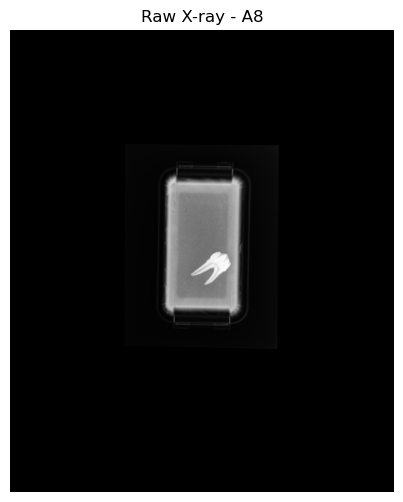

In [5]:
import pydicom
import matplotlib.pyplot as plt

# Load X-ray DICOM file
ds = pydicom.dcmread("IM-0003-0001.dcm")
img = ds.pixel_array

# Display raw X-ray image
plt.figure(figsize=(6,6))
plt.imshow(img, cmap="gray")
plt.title("Raw X-ray - A8")
plt.axis("off")
plt.savefig("xray_raw_A8.png", dpi=300, bbox_inches="tight")
plt.show()

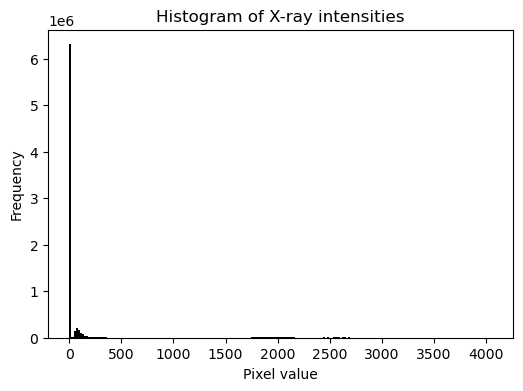

In [9]:
import numpy as np

plt.figure(figsize=(6,4))
plt.hist(img.flatten(), bins=200, color="black")
plt.title("Histogram of X-ray intensities")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

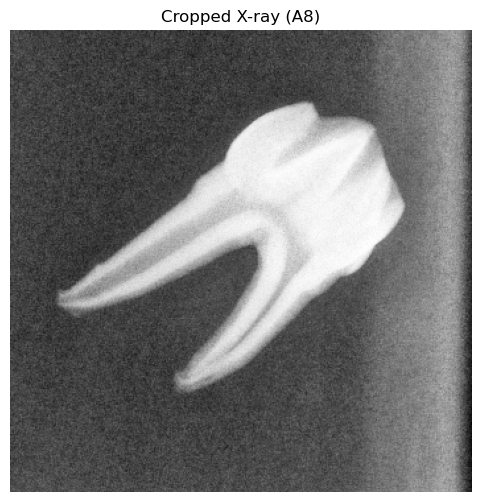

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# --- Crop X-ray billede ---
# Vælg crop-område manuelt (top:bottom, left:right)
# Disse værdier skal du tilpasse efter dit billede:
top = 1400
bottom = 1750
left = 1150
right = 1500

img_cropped = img[top:bottom, left:right]

plt.figure(figsize=(6,6))
plt.imshow(img_cropped, cmap="gray")
plt.title("Cropped X-ray (A8)")
plt.axis("off")
plt.show()

In [46]:
import pydicom

ds = pydicom.dcmread("IM-0003-0001.dcm")

wc = ds.WindowCenter
ww = ds.WindowWidth

print("WindowCenter:", wc)
print("WindowWidth :", ww)

WindowCenter: 2048
WindowWidth : 4096


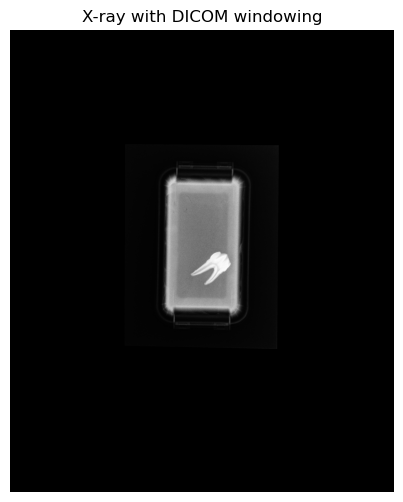

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_voi_lut, apply_modality_lut

# 1) raw pixels + evt rescale slope/intercept
img = apply_modality_lut(ds.pixel_array, ds).astype(np.float32)

# 2) windowing fra DICOM (VOI LUT / WindowCenter/Width)
img_w = apply_voi_lut(img, ds)

plt.figure(figsize=(6,6))
plt.imshow(img_w, cmap="gray")
plt.title("X-ray with DICOM windowing")
plt.axis("off")
plt.show()

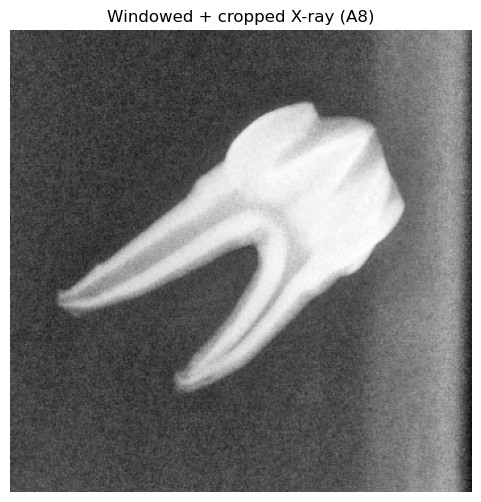

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut, apply_modality_lut

# --- load dicom ---
ds = pydicom.dcmread("IM-0003-0001.dcm")

# 1) raw pixels + rescale slope/intercept (modality LUT)
img = apply_modality_lut(ds.pixel_array, ds).astype(np.float32)

# 2) windowing fra DICOM (VOI LUT / WindowCenter/Width)
img_w = apply_voi_lut(img, ds)

# 3) CROP MED DINE VÆRDIER
top = 1400
bottom = 1750
left = 1150
right = 1500

img_crop = img_w[top:bottom, left:right]

# 4) vis + gem
plt.figure(figsize=(6,6))
plt.imshow(img_crop, cmap="gray")
plt.title("Windowed + cropped X-ray (A8)")
plt.axis("off")
plt.savefig("xray_windowed_cropped_A8.png", dpi=300, bbox_inches="tight")
plt.show()